# Урок 4. Метрики качества классификации ч.2

Продолжим работу с метриками классификации. В предыдущем задании мы разобрали матрицу ошибок и две основные метрики, которые используются при бинарной классификации.

Сейчас рассмотрим F-меру - совокупную метрику по precision и recall - и более сложную AUC-ROC.

In [1]:
import numpy as np
import pandas as pd

In [2]:
titanic_train = pd.read_csv('/Users/mikhail/Data Science Projects/Data Scientist/1. ML. Начальный уровень/06/titanic/train.csv')
titanic_test = pd.read_csv('/Users/mikhail/Data Science Projects/Data Scientist/1. ML. Начальный уровень/06/titanic/test.csv')
titanic_train.shape,titanic_test.shape


((891, 12), (418, 11))

In [3]:
median_male = titanic_train[titanic_train['Sex'] == 'male']['Age'].median()
median_female = titanic_train[titanic_train['Sex'] == 'female']['Age'].median()

In [4]:
titanic_train.loc[(titanic_train['Age'].isnull()) & (titanic_train['Sex']=='male'),'Age'] = median_male
titanic_train.loc[(titanic_train['Age'].isnull()) & (titanic_train['Sex']=='female'),'Age'] = median_female
titanic_train['Cabin'] = titanic_train['Cabin'].fillna('U')
titanic_train['Embarked'] = titanic_train['Embarked'].fillna('U')


In [5]:
titanic_train['Sex'] = titanic_train['Sex'].map({'male':1,'female':0})
titanic_train['Embarked'] = titanic_train['Embarked'].map({'U': 0, 'S': 1, 'C': 2, 'Q': 3})

In [9]:
from sklearn.model_selection import train_test_split
y = titanic_train['Survived']
X = titanic_train.drop('Survived',axis = 1)
X.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)

In [10]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
# Логистическая регрессия
log_reg = LogisticRegression(random_state=17)
log_reg.fit(X_train, y_train)

# Дерево решений
tree = DecisionTreeClassifier(random_state=17)
tree.fit(X_train, y_train)

nb = GaussianNB()
nb.fit(X_train, y_train)

# Метод ближайших соседей (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, recall_score
models = {
    'Logistic Regression': log_reg,
    'Decision Tree': tree,
    'GaussianNB': nb,
    'KNN': knn
}
for name,model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f"\n{name}")
    print("Confusion Matrix:")
    print(cm)
    # вручную считаем recall = TP / (TP + FN)
    TP = cm[1,1]
    FN = cm[1,0]
    recall_manual = TP / (TP + FN)
    
    print(f"Recall (manual): {recall_manual:.4f}")
    print(f"Recall (sklearn): {recall:.4f}")



Logistic Regression
Confusion Matrix:
[[113  18]
 [ 28  64]]
Recall (manual): 0.6957
Recall (sklearn): 0.6957

Decision Tree
Confusion Matrix:
[[112  19]
 [ 26  66]]
Recall (manual): 0.7174
Recall (sklearn): 0.7174

GaussianNB
Confusion Matrix:
[[111  20]
 [ 27  65]]
Recall (manual): 0.7065
Recall (sklearn): 0.7065

KNN
Confusion Matrix:
[[110  21]
 [ 48  44]]
Recall (manual): 0.4783
Recall (sklearn): 0.4783


/Users/mikhail/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 2.1
Из задания к предыдущему уроку выберите классификатор, который давал наименьшее значение recall, вычислите для него precision, применив precision_score, и самостоятельно посчитайте F1-меру (расчеты должны присутствовать). Затем проверьте ответ, используя встроенную функцию.

Сравните полученную f1-меру со значением среднего арифметического полноты и точности.

In [11]:
from sklearn.metrics import precision_score
y_pred_worst = knn.predict(X_test)
precision = precision_score(y_test, y_pred_worst)
print(f"\nPrecision for worst model (KNN): {precision:.4f}")



Precision for worst model (KNN): 0.6769


In [13]:
recall = 0.4783
precision = 0.6769
f1_manual = 2 * (precision * recall) / (precision + recall)
f1_manual


0.5605285145429363

In [14]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, knn.predict(X_test))
print("F1 через sklearn:", f1)


F1 через sklearn: 0.5605095541401274


In [15]:
mean_pr_re = (precision + recall) / 2
print("Среднее арифметическое precision и recall:", mean_pr_re)


Среднее арифметическое precision и recall: 0.5776


В библиотеке sklearn есть удобная функция classification_report, возвращающая precision, recall, F-меру и количество экземпляров каждого класса в удобном для чтения формате. Также существует функция precision_recall_fscore_support, возвращающая те же самые метрики, но в форме массива.

### 2.2
Для каждого классификатора из предыдущего урока рассчитайте и выведите следующие импортированные метрики.

In [17]:
from sklearn.metrics import precision_recall_fscore_support, classification_report
models = {
    'Logistic Regression': log_reg,
    'Decision Tree': tree,
    'GaussianNB': nb,
    'KNN': knn
}
for name, model in models.items():
    print(f"\n==== {name} ====")
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    prec,rec,f1,support = precision_recall_fscore_support(y_test,y_pred)
    print("precision:", prec)
    print("recall:", rec)
    print("f1:", f1)


==== Logistic Regression ====
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       131
           1       0.78      0.70      0.74        92

    accuracy                           0.79       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223

precision: [0.80141844 0.7804878 ]
recall: [0.86259542 0.69565217]
f1: [0.83088235 0.73563218]

==== Decision Tree ====
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       131
           1       0.78      0.72      0.75        92

    accuracy                           0.80       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223

precision: [0.8115942  0.77647059]
recall: [0.85496183 0.7173913 ]
f1: [0.83271375 0.74576271]

==== GaussianNB ====
              precision    recall  f1-score   support

           0       0.80

Вернемся к классификатору LogisticRegression, который мы обучали в предыдущем задании. Там мы не затрагивали настройку гиперпараметров: сделать это можно с помощью LogisticRegressionCV - перебора параметров по сетке с последующей кросс-валидацией (по сути это аналог GridSearchCV, но со своими параметрами внутри, применимыми только к логистической регрессии). Этот класс создан специально для логистической регрессии, т.к. для нее известны эффективные алгоритмы перебора параметров.

У LogisticRegression есть гиперпараметр C - обратный коэффициент регуляризации. Не вдаваясь в подробное описание по формуле, можно сказать, что C соответствует "сложности" модели: чем больше C, тем более сложные зависимости может восстанавливать модель; если параметр C слишком мал (слишком сильная регуляризация), то модель окажется недообученной, а если наоборот регуляризация слишком слабая (т.е. C принимает большие значения), то скорее всего модель окажется переобученной, потому как модель будет слишком "бояться" ошибиться на обучающей выборке.

### 2.3 

1. Используя StratifiedKFold, разбейте данные для кросс-валидации по 5-ти блокам (не забывайте во всех методах использовать random_state=17).
2. С помощью numpy.logspace разбейте интервал (-1, 2) на 500 значений.
3. С помощью LogisticRegressionCV подберите оптимальный параметр C: установите гиперпараметр Cs равным объекту из п.2 (разбиение интервала (-1, 2) отвечает за подбор обратного коэффициента регуляризации C); cv равным объекту из п.1 (разбиение для кросс-валидации); scoring равным "roc_auc" (отвечает за оптимизацию гиперпараметров на кросс-валидации: метрика, установленная в scoring, контролирует, как оценивать модель при каждом из наборе параметров, т.е. показывает, какая метрика должна быть наилучшей).
4. Обучите полученную модель на тренировочных данных.

In [18]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV
import numpy as np

In [19]:
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=17)

In [20]:
Cs = np.logspace(-1,2,500)

In [21]:
logreg_cv = LogisticRegressionCV(
    Cs = Cs,
    cv=cv,
    scoring='roc_auc',
    random_state=17,
    max_iter=1000
)

In [22]:
logreg_cv.fit(X_train,y_train)

LogisticRegressionCV(Cs=array([  0.1       ,   0.10139395,   0.10280732,   0.1042404 ,
         0.10569346,   0.10716676,   0.10866061,   0.11017528,
         0.11171107,   0.11326826,   0.11484715,   0.11644806,
         0.11807128,   0.11971713,   0.12138593,   0.12307798,
         0.12479362,   0.12653318,   0.12829698,   0.13008537,
         0.13189869,   0.13373729,   0.13560151,   0.13749172,
         0.13940828,   0.14135156,   0.14332192,   0.14531975,
         0.14734543,   0.149399...
        72.73165113,  73.7454909 ,  74.77346305,  75.81576458,
        76.87259522,  77.9441575 ,  79.03065679,  80.13230128,
        81.24930211,  82.38187331,  83.53023195,  84.69459808,
        85.87519485,  87.07224849,  88.28598841,  89.51664721,
        90.76446073,  92.02966809,  93.31251175,  94.61323756,
        95.93209478,  97.26933615,  98.62521795, 100.        ]),
                     cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
                     max_iter=1000, random_state=17, scoring='roc_auc')

In [23]:
print("Лучшее C:", logreg_cv.C_[0])


Лучшее C: 0.8200260619934131


### 2.4
Используя метод plot из matplotlib.pyplot, выведите график зависимости auc_roc от значения C.

*Примечание: значения по оси x - разбиение с помощью np.logspace из п.2 предыдущего задания, а значения по оси y - среднее значение roc_auc по каждой валидации, т.е. среднее значение из полученных на каждом из 5-ти разбиений при данном параметре C (используйте метод scores_ объекта, который инкапсулирует LogisticRegressionCV).*

In [24]:
import matplotlib.pyplot as plt


In [32]:
mean_scores = logreg_cv.scores_[1].mean(axis=0)

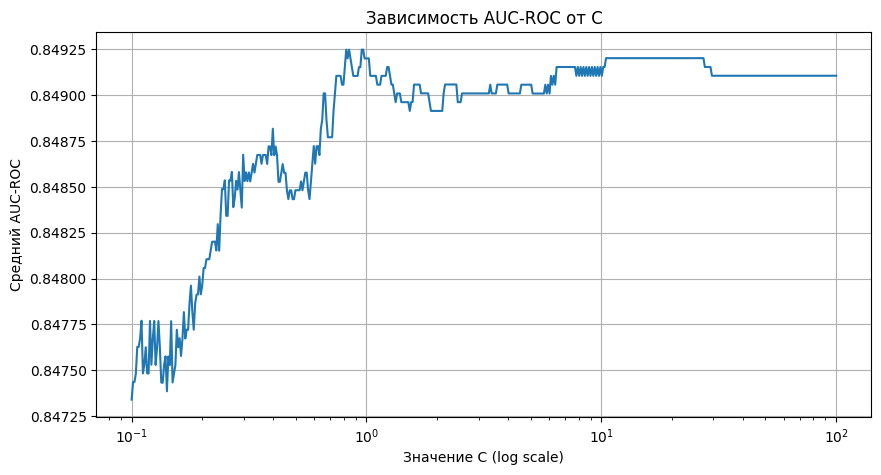

In [33]:
plt.figure(figsize=(10, 5))
plt.plot(Cs, mean_scores)
plt.xscale("log")
plt.xlabel("Значение C (log scale)")
plt.ylabel("Средний AUC-ROC")
plt.title("Зависимость AUC-ROC от C")
plt.grid(True)
plt.show()

### 2.5
С помощью метода C_ того же объекта выведите лучшее значение C. Выведите более конкретную область графика (область ~15 точкам по x), включающую лучшее значение C.

*Примечание: используйте plt.xlim.*

In [36]:
best_C = logreg_cv.C_[0]
print("Лучшее значение C:", best_C)

Лучшее значение C: 0.8200260619934131


In [37]:
best_idx = np.argmin(np.abs(Cs-best_C))
left = max(best_idx - 7,0)
right = min(best_idx + 8,len(Cs))

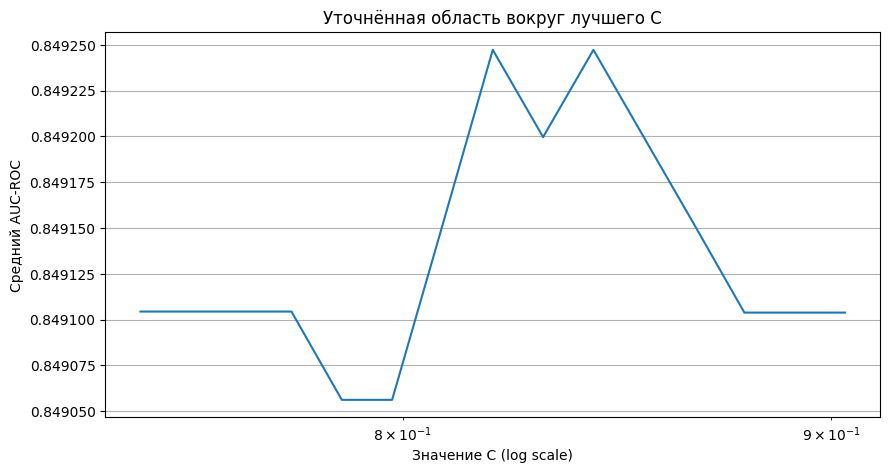

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(Cs[left:right], mean_scores[left:right])
plt.xscale("log")
plt.xlabel("Значение C (log scale)")
plt.ylabel("Средний AUC-ROC")
plt.title("Уточнённая область вокруг лучшего C")
plt.grid(True)
plt.show()

### 2.6
С помощью метода predict_proba получите вероятности принадлежности объектов тестовой выборки к классам. Постройте график roc_auc для тестовой выборки и выведите значение auc.

In [46]:
from sklearn.metrics import roc_auc_score, roc_curve
y_proba = logreg_cv.predict_proba(X_test)[:,1]
y_proba

array([0.13080903, 0.9122136 , 0.09860076, 0.07145884, 0.93825784,
       0.0736391 , 0.0586043 , 0.24250635, 0.11519935, 0.56378598,
       0.63123366, 0.13604676, 0.08457497, 0.04891049, 0.8507594 ,
       0.09428598, 0.60034252, 0.08984642, 0.94217172, 0.31341103,
       0.64336636, 0.13286455, 0.65596494, 0.07197391, 0.86418582,
       0.41945994, 0.33279321, 0.14076894, 0.08991982, 0.04651751,
       0.09143636, 0.06985485, 0.06948667, 0.55591352, 0.30975809,
       0.60921102, 0.01051258, 0.71498514, 0.14475306, 0.70362705,
       0.74057148, 0.21904338, 0.71020351, 0.25521374, 0.49432416,
       0.28125644, 0.09751621, 0.83758843, 0.90857801, 0.26870145,
       0.86796132, 0.9570836 , 0.14527629, 0.19042576, 0.07794016,
       0.84407669, 0.1189642 , 0.02739791, 0.11947515, 0.1144351 ,
       0.73243973, 0.06312226, 0.49666256, 0.70615771, 0.95213009,
       0.9021041 , 0.60580794, 0.08619668, 0.33081671, 0.1388029 ,
       0.87354812, 0.07238831, 0.08990137, 0.49418115, 0.31397

In [47]:
roc_auc = roc_auc_score(y_test,y_proba)
print("ROC AUC:", roc_auc)


ROC AUC: 0.8537587122469299


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

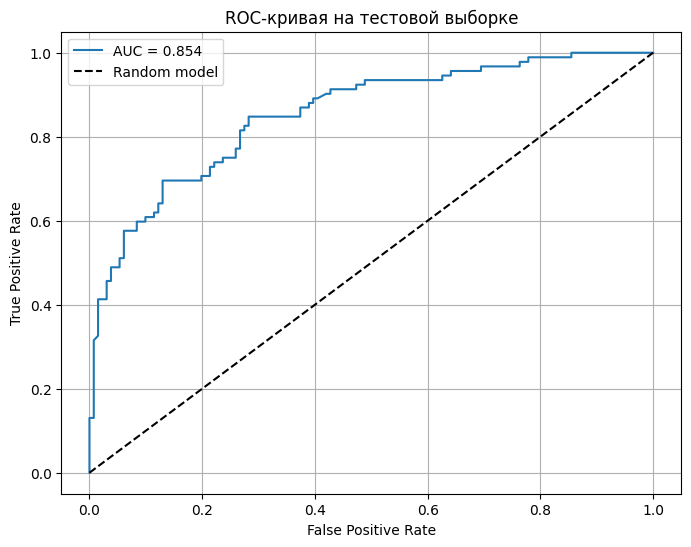

In [49]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], "k--", label="Random model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая на тестовой выборке")
plt.legend()
plt.grid(True)
plt.show()
